In [190]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


%matplotlib inline
plt.style.use('seaborn')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Data Cleaning

In [191]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header=None)
header = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'serum_cholesterol', 'fasting_blood_sugar',
          'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak',
          'slope', 'num_major_vessels', 'thal','heart_disease']
df.columns = header
# heart_disease is my target varaible.

# since the are only 0.0198 of the dataset, i will just drop them.
df = df.replace('?', np.nan)
df = df.dropna()

# data cleaning.
df['age'] = df.age.astype('int')
df['sex'] = df.sex.astype('category')
df['fasting_blood_sugar'] = df.fasting_blood_sugar.astype('category')
df['resting_electrocardiographic'] = df.resting_electrocardiographic.astype('category')
df['exercise_induced_angina'] = df.exercise_induced_angina.astype('category')
df['slope'] = df.slope.astype('category')
df['num_major_vessels'] = df.num_major_vessels.astype('category')
df['thal'] = df.thal.astype('category')
# group 2, 3, 4 of heart disease into 1.
df['heart_disease'] = df.heart_disease.astype('category')
df['heart_disease'] = df.heart_disease.replace([2, 3, 4], 1)

# get dummies.
pd.set_option('display.max_columns', 500)
clean_df = pd.concat([df.heart_disease, pd.get_dummies(data=df, columns=['chest_pain', 'resting_electrocardiographic', 'slope', 'num_major_vessels', 'thal'], 
               drop_first=True).drop('heart_disease', axis=1)], axis=1)

# splitting my train/test set with stratify.
X = clean_df.iloc[:, 1:]
y = clean_df.heart_disease
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# my data has non binary in the columns, so I need to scale my data.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled  = ss.transform(X_test)

In [192]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,num_major_vessels,thal,heart_disease
0,63,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Base Model

In [193]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    CVScores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='recall')
    print(f'{name} CV_recall is:', np.mean(CVScores))
    
# logit > linearSVM > SVM/XGboost 

KNN CV_recall is: 0.6210526315789473
Logit CV_recall is: 0.8105263157894737
Tree CV_recall is: 0.6736842105263159
Forst CV_recall is: 0.7368421052631579
SVM CV_recall is: 0.7368421052631579
LinearSVM CV_recall is: 0.8
GaussioanNB CV_recall is: 0.6
XGboost CV_recall is: 0.7368421052631579


/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

# Using GridSearchCV to find best parameters

In [194]:
models = [('KNN', KNeighborsClassifier),
          ('Logit', LogisticRegression),
          ('Tree', DecisionTreeClassifier),
          ('Forest', RandomForestClassifier),
          ('SVM', SVC),
          ('GaussioanNB', GaussianNB),
          ('XGboost', XGBClassifier)
]

param_choices = [
    {# knn parameter
        'n_neighbors': range(1,21),
        'weights': ['uniform', 'distance']
    },
    {# logit 
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'penalty': ['l1', 'l2']
    },
    {# tree
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    },
    {# forst
        'n_estimators': [50,100,200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    },
    {# SVM
        'kernel': ['linear','rbf','poly'], 'gamma': [0.0001,0.001,0.01,0.1], 'C': [0.001,0.01,0.1,1,10,100,1000]
         #{'kernel': ['linear'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
         #{'kernel': ['ploy'], 'gamma': [0.0001,0.001,0.01,0.1], 'C': [0.001,0.01,0.1,1,10,100,1000]}
        
    },
    {# gaussionNB
        'priors': [None]
    },
    {# XGboost
        'n_estimators': [50,100,200],
        'max_depth': [1,2,3,4,5],
    }
    
]


grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, cv=5, scoring='recall')
    grid.fit(X_train_scaled, y_train)
    s = f"{name}: best recall score: {grid.best_score_}"
    print(s)
    grids[name] = grid.best_estimator_
    
# logit > xgboost > SVM > Tree > Forst > 

KNN: best recall score: 0.7678616831934908
Logit: best recall score: 0.8105771675565726
Tree: best recall score: 0.779303330790745
Forest: best recall score: 0.7681159420289855
SVM: best recall score: 0.7782862954487668
GaussioanNB: best recall score: 0.5997965929316044


/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

XGboost: best recall score: 0.7889651665395373


/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

In [195]:
grids['Logit']

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [196]:
clf = LogisticRegression(C=100, penalty='l1')
clf.fit(X_train_scaled, y_train)
cvscores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='recall')
print(np.mean(cvscores))

0.8105263157894737


In [197]:
y_pred = clf.predict(X_test_scaled)
Score = accuracy_score(y_test, y_pred)
print('recall is:', recall_score(y_test, y_pred))
print('precision is:', precision_score(y_test, y_pred))

recall is: 0.7142857142857143
precision is: 0.8571428571428571


# Feature Engineering

In [198]:
X_train.head()

,age,sex,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,maximum_heart_rate,exercise_induced_angina,oldpeak,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0,resting_electrocardiographic_1.0,resting_electrocardiographic_2.0,slope_2.0,slope_3.0,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,thal_6.0,thal_7.0
115,41,1.0,135.0,203.0,0.0,132.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1,0
94,63,0.0,135.0,252.0,0.0,172.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
186,42,1.0,120.0,240.0,1.0,194.0,0.0,0.8,0,1,0,0,0,0,1,0,0,0,0,1
68,59,1.0,170.0,326.0,0.0,140.0,1.0,3.4,0,0,1,0,1,0,1,0,0,0,0,1
86,47,1.0,138.0,257.0,0.0,156.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0


In [199]:
clf.coef_

array([[ 0.04977878,  0.8013887 ,  0.44343523,  0.4116004 , -0.18044021,
        -0.10422446,  0.3742318 ,  0.24364141,  0.47357041, -0.18964382,
         1.16425039,  0.24030179,  0.3267987 ,  0.67064681,  0.34785718,
         0.99956877,  1.0782794 ,  0.21751891, -0.02518252,  0.92625837]])

In [208]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=8).fit(abs(X_train_scaled), y_train)

In [209]:
X_train[X_train.columns[select_feature.get_support(indices=True)]].columns

Index(['sex', 'exercise_induced_angina', 'oldpeak', 'chest_pain_2.0',
       'chest_pain_3.0', 'num_major_vessels_1.0', 'num_major_vessels_2.0',
       'num_major_vessels_3.0'],
      dtype='object')

In [210]:
select_feature.transform(abs(X_train_scaled))

array([[0.63887656, 0.7148069 , 0.89013702, ..., 0.52704628, 0.39550548,
        0.2588635 ],
       [1.56524758, 0.7148069 , 0.89013702, ..., 0.52704628, 0.39550548,
        0.2588635 ],
       [0.63887656, 0.7148069 , 0.20864516, ..., 0.52704628, 0.39550548,
        0.2588635 ],
       ...,
       [1.56524758, 0.7148069 , 0.89013702, ..., 0.52704628, 0.39550548,
        0.2588635 ],
       [0.63887656, 1.39897922, 0.64321968, ..., 0.52704628, 0.39550548,
        0.2588635 ],
       [1.56524758, 0.7148069 , 0.89013702, ..., 0.52704628, 2.52841   ,
        0.2588635 ]])

In [211]:
X_train.columns

Index(['age', 'sex', 'resting_blood_pressure', 'serum_cholesterol',
       'fasting_blood_sugar', 'maximum_heart_rate', 'exercise_induced_angina',
       'oldpeak', 'chest_pain_2.0', 'chest_pain_3.0', 'chest_pain_4.0',
       'resting_electrocardiographic_1.0', 'resting_electrocardiographic_2.0',
       'slope_2.0', 'slope_3.0', 'num_major_vessels_1.0',
       'num_major_vessels_2.0', 'num_major_vessels_3.0', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

In [212]:
select_feature.scores_

array([1.60504401e+00, 2.89160341e+00, 8.96777591e-01, 3.13054622e-01,
       6.63461174e-02, 7.92736674e-01, 3.80170703e+00, 5.69747991e+00,
       7.95432271e+00, 5.76095984e+00, 1.29760906e-03, 2.08676132e+00,
       1.57400652e-03, 2.75527603e-01, 2.15442854e+00, 3.86964163e+00,
       1.08324234e+01, 8.47502238e+00, 1.13930924e+00, 2.01127864e+00])

# Model with selected predictors

In [213]:
clf.coef_

array([[ 0.04977878,  0.8013887 ,  0.44343523,  0.4116004 , -0.18044021,
        -0.10422446,  0.3742318 ,  0.24364141,  0.47357041, -0.18964382,
         1.16425039,  0.24030179,  0.3267987 ,  0.67064681,  0.34785718,
         0.99956877,  1.0782794 ,  0.21751891, -0.02518252,  0.92625837]])

In [220]:
X.columns

Index(['age', 'sex', 'resting_blood_pressure', 'serum_cholesterol',
       'fasting_blood_sugar', 'maximum_heart_rate', 'exercise_induced_angina',
       'oldpeak', 'chest_pain_2.0', 'chest_pain_3.0', 'chest_pain_4.0',
       'resting_electrocardiographic_1.0', 'resting_electrocardiographic_2.0',
       'slope_2.0', 'slope_3.0', 'num_major_vessels_1.0',
       'num_major_vessels_2.0', 'num_major_vessels_3.0', 'thal_6.0',
       'thal_7.0'],
      dtype='object')

In [235]:
selected_X = clean_df.iloc[:, [1, 2, 3, 4, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20]]
selected_y = clean_df.heart_disease

In [236]:
# splitting my train/test set with stratify.
X_train, X_test, y_train, y_test = train_test_split(selected_X, selected_y, test_size=0.30, stratify=selected_y, random_state=42)

# my data has non binary in the columns, so I need to scale my data.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled  = ss.transform(X_test)

In [237]:
names = ['KNN',
        'Logit',
        'Tree',
        "Forst",
        'SVM',
        'LinearSVM',
        'GaussioanNB',
        'XGboost']

clfs = [(KNeighborsClassifier(n_neighbors=4)), 
        (LogisticRegression(C=1000)),
        (DecisionTreeClassifier()),
        (RandomForestClassifier()),
        (SVC()),
        (LinearSVC()),
        (GaussianNB()),
        (XGBClassifier())
         ]
for name, clf in zip(names, clfs):
    CVScores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='recall')
    print(f'{name} CV_recall is:', np.mean(CVScores))
    
# logit > linearSVM > XGboost > SVM

KNN CV_recall is: 0.6210526315789474
Logit CV_recall is: 0.8105263157894738
Tree CV_recall is: 0.6736842105263158
Forst CV_recall is: 0.6842105263157895
SVM CV_recall is: 0.7578947368421053
LinearSVM CV_recall is: 0.8105263157894737
GaussioanNB CV_recall is: 0.6210526315789473
XGboost CV_recall is: 0.7684210526315789


/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

In [238]:
models = [('KNN', KNeighborsClassifier),
          ('Logit', LogisticRegression),
          ('Tree', DecisionTreeClassifier),
          ('Forest', RandomForestClassifier),
          ('SVM', SVC),
          ('GaussioanNB', GaussianNB),
          ('XGboost', XGBClassifier)
]

param_choices = [
    {# knn parameter
        'n_neighbors': range(1,21),
        'weights': ['uniform', 'distance']
    },
    {# logit 
        'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000],
        'penalty': ['l1', 'l2']
    },
    {# tree
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    },
    {# forst
        'n_estimators': [50,100,200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
    },
    {# SVM
        'kernel': ['linear','rbf','poly'], 'gamma': [0.0001,0.001,0.01,0.1], 'C': [0.001,0.01,0.1,1,10,100,1000]
         #{'kernel': ['linear'], 'C': [0.001,0.01,0.1,1,10,100,1000]},
         #{'kernel': ['ploy'], 'gamma': [0.0001,0.001,0.01,0.1], 'C': [0.001,0.01,0.1,1,10,100,1000]}
        
    },
    {# gaussionNB
        'priors': [None]
    },
    {# XGboost
        'n_estimators': [50,100,200],
        'max_depth': [1,2,3,4,5],
    }
    
]


grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, cv=5, scoring='recall')
    grid.fit(X_train_scaled, y_train)
    s = f"{name}: best recall score: {grid.best_score_}"
    print(s)
    grids[name] = grid
    
# logit > KNN > SVM > Forst > XGboost 

KNN: best recall score: 0.821256038647343
Logit: best recall score: 0.8423595219933894
Tree: best recall score: 0.7274345283498601
Forest: best recall score: 0.779303330790745
SVM: best recall score: 0.8110856852275616
GaussioanNB: best recall score: 0.6226798881261124


/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

XGboost: best recall score: 0.7795575896262396


/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

In [239]:
grids['Logit'].best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [240]:
clf = LogisticRegression(C=0.001, penalty='l2')
clf.fit(X_train_scaled, y_train)
cvscores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring='recall')
print(np.mean(cvscores))

0.8421052631578949


In [243]:
y_pred = clf.predict(X_test_scaled)
Score = accuracy_score(y_test, y_pred)
print('recall is:', recall_score(y_test, y_pred))
print('precision is:', precision_score(y_test, y_pred))
print('accuracy is:', accuracy_score(y_test, y_pred))
print('f1 is:', f1_score(y_test, y_pred))

recall is: 0.8571428571428571
precision is: 0.8780487804878049
accuracy is: 0.8777777777777778
f1 is: 0.8674698795180722


In [244]:
clf.coef_

array([[ 0.0199152 ,  0.02507845,  0.01255322,  0.0062393 , -0.02269212,
        -0.03158639,  0.04775211,  0.03044915,  0.00800058,  0.02142833,
         0.02428295,  0.01475348,  0.00541075,  0.04602476]])

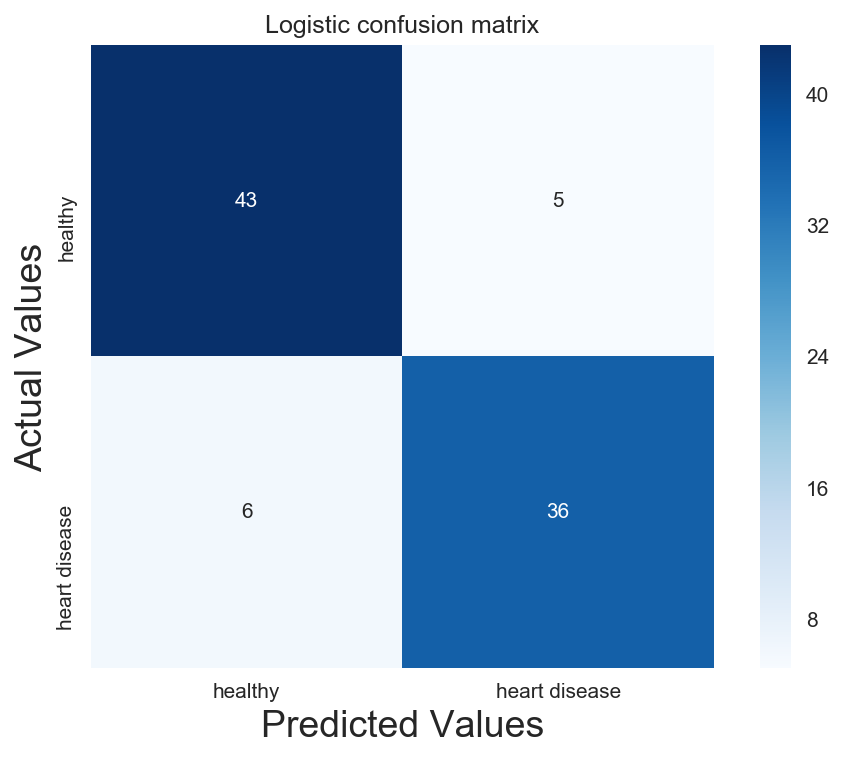

In [245]:
# confusion matrix for logit final model
rf_confusion_with_default_threshold = confusion_matrix(y_test, y_pred)
plt.figure(dpi=150)
sns.heatmap(rf_confusion_with_default_threshold, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['healthy', 'heart disease'],
           yticklabels=['healthy', 'heart disease'])

plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Logistic confusion matrix');

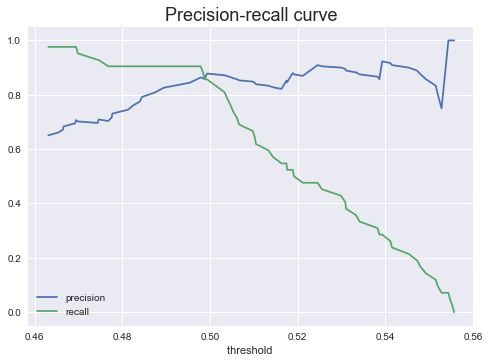

In [246]:
# precision vs recall curve
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])

plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('threshold ')
plt.title('Precision-recall curve', fontsize=18);

ROC AUC score =  0.9087301587301588


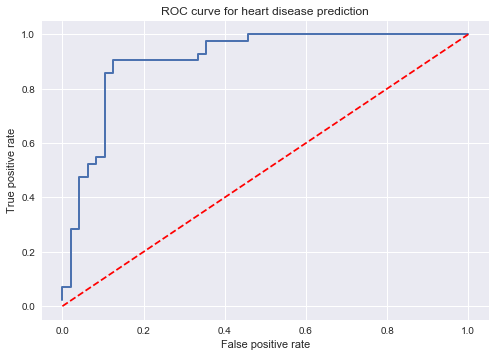

In [247]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='r',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for heart disease prediction')
print("ROC AUC score = ", roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:,1]));

In [248]:
# these are the selected features
X_train.columns

Index(['age', 'sex', 'resting_blood_pressure', 'serum_cholesterol',
       'chest_pain_2.0', 'chest_pain_3.0', 'chest_pain_4.0', 'slope_2.0',
       'slope_3.0', 'num_major_vessels_1.0', 'num_major_vessels_2.0',
       'num_major_vessels_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

# Using Logistic as final model

In [146]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('scaler', StandardScaler()),
                     ('logistic', LogisticRegression(**grids['Logit'].best_params_))])

# Do the impuation step
#X.Age.fillna(X.groupby(['Sex', 'Pclass']).Age.transform(np.median), inplace=True)

pipeline.fit(selected_X, selected_y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [147]:
selected_X.columns

Index(['age', 'sex', 'resting_blood_pressure', 'serum_cholesterol',
       'chest_pain_2.0', 'chest_pain_3.0', 'chest_pain_4.0', 'slope_2.0',
       'slope_3.0', 'num_major_vessels_1.0', 'num_major_vessels_2.0',
       'num_major_vessels_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [160]:
import pickle

pickle.dump(pipeline, open('model.pkl', 'wb'))

In [149]:
selected_X.iloc[0]

age                        63
sex                         1
resting_blood_pressure    145
serum_cholesterol         233
chest_pain_2.0              0
chest_pain_3.0              0
chest_pain_4.0              0
slope_2.0                   0
slope_3.0                   1
num_major_vessels_1.0       0
num_major_vessels_2.0       0
num_major_vessels_3.0       0
thal_6.0                    1
thal_7.0                    0
Name: 0, dtype: object

In [154]:
example = {
  'age': 63,  # int
  'sex': 1,    # M or F
  'resting_blood_pressure': 145,    # int
  'serum_cholesterol': 233,  # int
  'chest_pain_2.0': 0,  # int
  'chest_pain_3.0': 0,    # float
  'chest_pain_4.0': 0,
  'slope_2.0': 0,
  'slope_3.0': 1,
  'num_major_vessels_1.0': 0,
  'num_major_vessels_2.0': 0,
  'num_major_vessels_3.0': 0,
  'thal_6.0': 1,
  'thal_7.0': 0
}

def make_prediction(features):
    X = np.array([features['age'], features['sex'], features['resting_blood_pressure'], 
                  features['serum_cholesterol'], features['chest_pain_2.0'], features['chest_pain_3.0'],
                 features['chest_pain_4.0'], features['slope_2.0'], features['slope_3.0'],
                 features['num_major_vessels_1.0'], features['num_major_vessels_2.0'], features['num_major_vessels_3.0'],
                 features['thal_6.0'], features['thal_7.0']]).reshape(1,-1)
    prob_heart_diseased = pipeline.predict_proba(X)[0, 1]
    
    result = {
        'prediction': int(prob_heart_diseased > 0.5),
        'prob_heart_diseased': prob_heart_diseased
    }
    return result

In [155]:
make_prediction(example)

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


{'prediction': 0, 'prob_heart_diseased': 0.4957660906774125}

In [159]:
pipeline.predict_proba(selected_X.iloc[0].values.reshape(1,-1))

/Users/ka/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.50423391, 0.49576609]])

In [158]:
selected_y.iloc[0]

0